# Analisis de examen transversal

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np

In [2]:
df = pd.read_csv(r"C:\weatherAUS.csv")

Se realiza un analisis exploratorio utilizando pandas profilling y se muestras las primeras 5 filas para poder observar las variables del informe en analisis

In [3]:
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file("ClimaAustralia.html")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Analisis de los tipo de datos que se encuentran en el dataframe  

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

En el la siguiente imagen podemos observar el total de variables que son 24, el tipo de variables, como categóricas, numéricas y booleanas además la cantidad de datos perdidos en este DataFrame que para este caso posee un 9,3% de pérdida. 

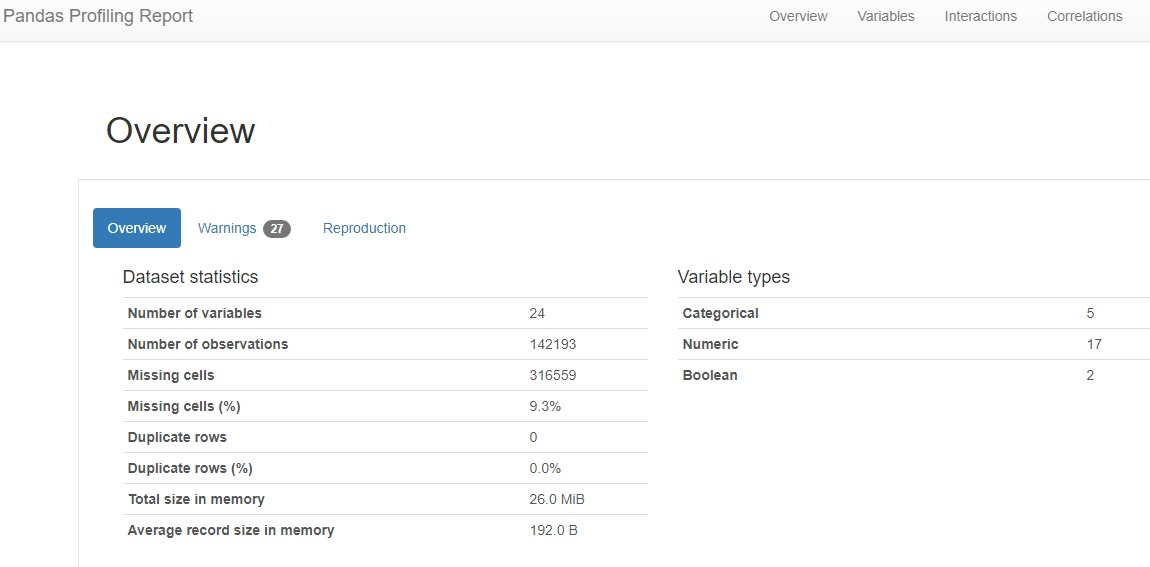

columnas con perdidas de datos: temperatura min, temperatura max, rainfall, evaporation, sunshine, windgustdir, windgustspeed, windDir9am, winddir3pm, windspeed9am, windspeed3pm, humidity9am, humidity3pm, pressure9am, pressure3pm, cloud9am, cloud3pm, temp9am, temp3pm, raintoday,

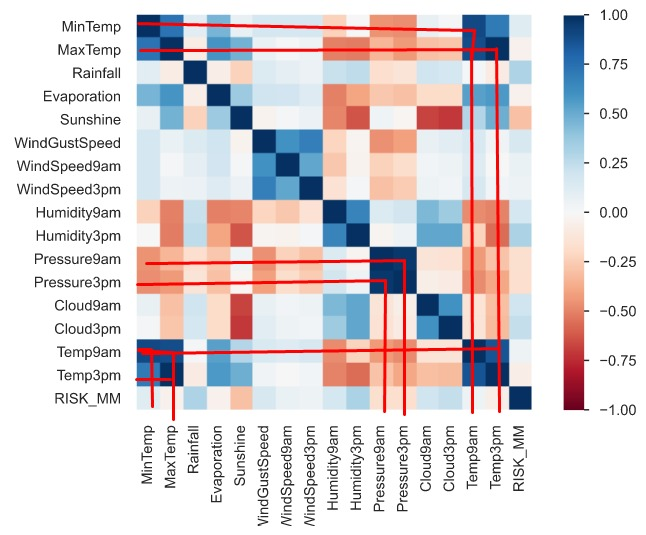

Maxtemp con temp3pm se encuentran altamente correlacionadas segun el diagrama de pearson's, lo que indica que una de estas variables es la candidata a ser eliminadas, analizandolo bien temp3pm tiene una mayor cantidad de datos pedidos equivalentes a 1,9% de datos perdidos en comparación a maxtemp que tiene 0.2% en datos perdidos

Pressure9am y pressure3pm estan altamente correlacionadas, ambos poseen una gran perdida datos correspondientes a 9,9% y 9,8%

Sunshine 47,7 % mayor cantidad de perdidas de datos, pero esta alta mente correlacionada con la variable objetivo

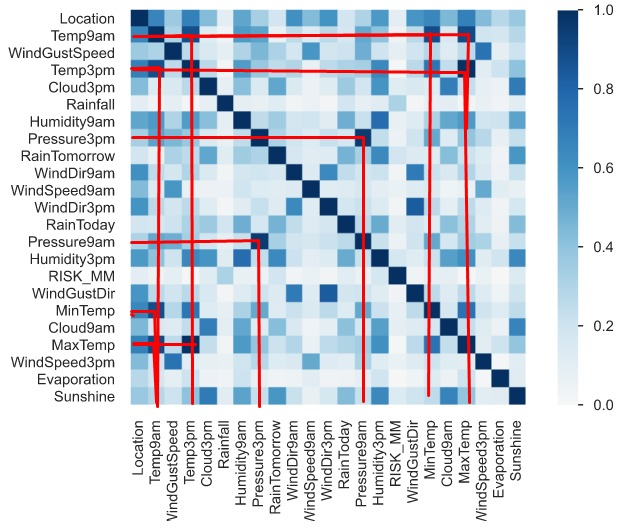

El siguiente contiene marcado en rojo, las correlaciones de las variable numéricas, siendo el número 1 muy altamente correlacionado, nosotros seleccionamos las de 0,8 hacia arriba, se decidió eliminar las que tienen una mayor pérdida datos y no se relacionan con la variable objetivo .

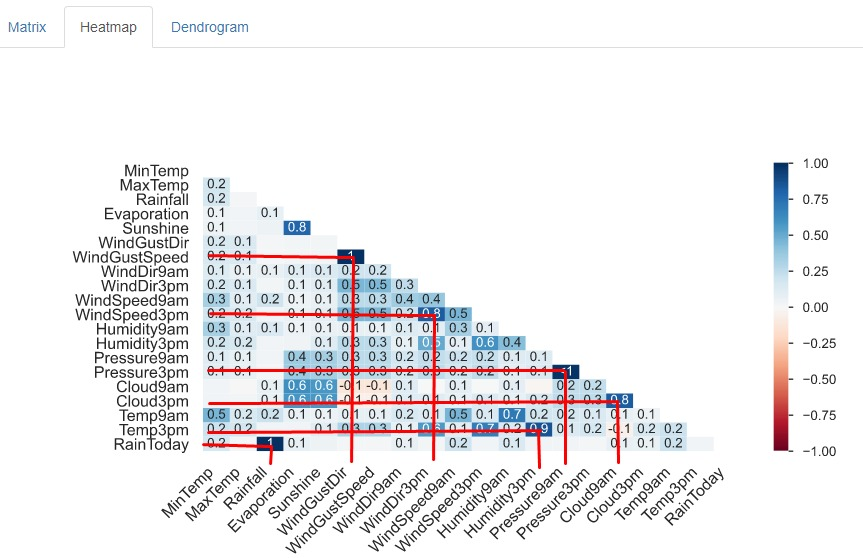

## Eliminar columnas del set de datos de acuerdo al criterio, del valor que agregue o no, cada una de ellas para el logro del objetivo del proyecto.

- Se elimina la columna Sunshine, por los siguientes motivos que tiene un 47,7% de datos perdidos como se puede apreciar en la siguiente imagen. Esta columna tiene una leve correlación con la variable objetivo la cual nos hizo reconsiderar esta decisión, pero luego de un análisis pudimos observar que al modificar esta columna su distribución de datos cambiaría mucho por lo que podría afectar en las decisiones a tomar y lo que justifica aún más su eliminación.
- Se elimina la columna Rainfall, porque tiene alta correlación con la variable RainToday y no tiene correlación con la variable objetivo.
- En este caso se eliminará la Columna Evaporation la cual tiene un alta cantidad de datos perdidos, esta equivale a un 42.8% se podría considerar que no cumple un rol importante. Además esta no tiene relación con la variable objetivo por lo que sería considerada de esta manera.
- Se eliminara la columna WindGustDir, los motivos por lo cual este sería eliminado son, que tiene mayor porcentaje de datos perdidos que la variable WindGustSpeed y además no tiene relación con la variable objetivo por lo que nos hizo tomar la decisión de eliminar esta.
- Se eliminará la columna WindDir3pm, los motivo en este caso serían que la variable tendría más porcentaje de datos perdidos que WindSpeed3pm, además esta tiene datos categóricos por lo que sería más eficiente eliminar esta que una numérica y no tiene relación con la variable objetivo.
- Se elimina la columna Pressure9am Tiene alta correlación con pressure3pm, también tiene mayor % de datos perdidos y no tiene correlación con la variable objetivo.
- Se elimina la columna Cloud9am porque tiene alta correlación con Cloud3pm, además tiene un 37,7% de datos perdidos.
- Se eliminará la columna Cloud3pm, los motivos por lo que se eliminara serían que esta tiene un 40,2% de datos perdidos y no se puede rellenar los datos perdidos con el promedio porque cambia la distribución de los datos. Esta Tiene relación con la variable objetivo pero no es alta por lo que esta no afectaría.
- Se elimina la columna Temp3pm porque tiene alta correlacion con la variable maxtemp, tambien tiene mayor % de datos perdidos y no tiene correlacion con la variable objetivo.


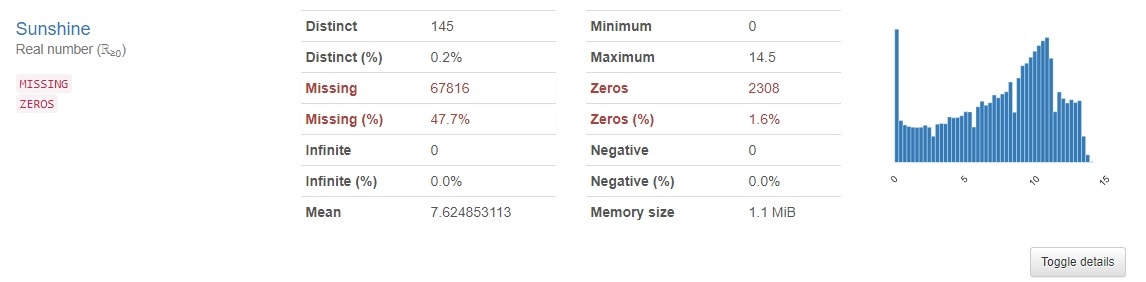

In [6]:
df["Anio"] = df["Date"]

In [7]:
df["Anio"] = pd.to_datetime(df["Anio"])
df["Anio"] = df["Anio"].dt.year
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Anio
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008


In [8]:
df["Mes"] = df["Date"]

In [9]:
df["Mes"] = pd.to_datetime(df["Mes"])
df["Mes"] = df["Mes"].dt.month
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Anio,Mes
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12


In [10]:
df["Dia"] = df["Date"]

In [11]:
df["Dia"] = pd.to_datetime(df["Dia"])
df["Dia"] = df["Dia"].dt.day
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Anio,Mes,Dia
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [1]:
df.drop(columns = 'Sunshine', inplace=True)
df.drop(columns = 'Evaporation', inplace=True)
df.drop(columns = 'WindGustDir', inplace=True)
df.drop(columns = 'WindDir3pm', inplace=True)
df.drop(columns = 'Pressure9am', inplace=True)
df.drop(columns = 'Cloud9am', inplace=True)
df.drop(columns = 'Cloud3pm', inplace=True)
df.drop(columns = 'Temp3pm', inplace=True)




NameError: name 'df' is not defined

## Renombrar columnas del set de datos

Se renombran las columnas, ya que estas se encontraban en inglés y ahora se encuentran en español para una mejor comprensión de estas en el siguiente codigo se puede apreciar como quedaron cada una de las variables con sus respectivos nombres en español.

In [13]:
cabecera = ["Localizacion","TempMinima","TempMaxima","VelRafagaViento", "DirViento9am","VelViento9am", "VelViento3pm","Humedad9am","Humedad3pm","Presion3pm","Temperatura9pm","LluviaHoy","LluviaMañana","Anio","Mes","Dia"]
df.columns = cabecera
df

,Localizacion,TempMinima,TempMaxima,VelRafagaViento,DirViento9am,VelViento9am,VelViento3pm,Humedad9am,Humedad3pm,Presion3pm,Temperatura9pm,LluviaHoy,LluviaMañana,Anio,Mes,Dia
0,Albury,13.4,22.9,44.0,W,20.0,24.0,71.0,22.0,1007.1,16.9,No,No,2008,12,1
1,Albury,7.4,25.1,44.0,NNW,4.0,22.0,44.0,25.0,1007.8,17.2,No,No,2008,12,2
2,Albury,12.9,25.7,46.0,W,19.0,26.0,38.0,30.0,1008.7,21.0,No,No,2008,12,3
3,Albury,9.2,28.0,24.0,SE,11.0,9.0,45.0,16.0,1012.8,18.1,No,No,2008,12,4
4,Albury,17.5,32.3,41.0,ENE,7.0,20.0,82.0,33.0,1006.0,17.8,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,31.0,ESE,15.0,13.0,59.0,27.0,1021.2,9.4,No,No,2017,6,20
142189,Uluru,2.8,23.4,31.0,SE,13.0,11.0,51.0,24.0,1020.3,10.1,No,No,2017,6,21
142190,Uluru,3.6,25.3,22.0,SE,13.0,9.0,56.0,21.0,1019.1,10.9,No,No,2017,6,22
142191,Uluru,5.4,26.9,37.0,SE,9.0,9.0,53.0,24.0,1016.8,12.5,No,No,2017,6,23


# Se cambia tipo de dato de categorico a numerico

Mediante nuestro análisis logramos identificar que las variables Localización Y DirViento9am Deben ser cambiadas desde categóricas a numéricas. 
La variable “Localización” nos muestra las ciudades donde se presentan las condiciones climáticas entregadas por el dataset, estos datos fueron cambiados desde 01 hasta el 49, de esta manera le entregamos un número a cada ciudad.

In [14]:
df["Localizacion"] = df["Localizacion"].map({'Albury':'01',
                                            'BadgerysCreek':'02',
                                            'Cobar':'03'
                                            ,'CoffsHarbour':'04',
                                            'Moree':'05',
                                            'Newcastle':'06',
                                            'NorahHead':'07',
                                            'NorfolkIsland':'08',
                                            'Penrith':'09',
                                            'Richmond':'10',
                                            'Sydney':'11',
                                             'SydneyAirport':'12',
                                             'WaggaWagga':'13',
                                             'Williamtown':'14',
                                             'Wollongong':'15',
                                             'Canberra':'16',
                                             'Tuggeranong':'17',
                                             'MountGinini':'18',
                                             'Ballarat':'19',
                                             'Bendigo':'20',
                                             'Sale':'21',
                                             'MelbourneAirport':'22',
                                             'Melbourne':'23',
                                             'Mildura':'24',
                                             'Nhil':'25',
                                             'Portland':'26',
                                             'Watsonia':'27',
                                             'Dartmoor':'28',
                                             'Brisbane':'29',
                                             'Cairns':'30',
                                             'GoldCoast':'31',
                                             'Townsville':'32',
                                             'Adelaide':'33',
                                             'MountGambier':'34',
                                             'Nuriootpa':'35',
                                             'Woomera':'36',
                                             'Albany':'37',
                                             'Witchcliffe':'38',
                                             'PearceRAAF':'39',
                                             'PerthAirport':'40',
                                             'Perth':'41',
                                             'SalmonGums':'42',
                                             'Walpole':'43',
                                             'Hobart' :'44',
                                             'Launceston':'45',
                                             'AliceSprings':'46',
                                             'Darwin':'47',
                                             'Katherine':'48',
                                             'Uluru':'49'})

In [15]:
df.head()

,Localizacion,TempMinima,TempMaxima,VelRafagaViento,DirViento9am,VelViento9am,VelViento3pm,Humedad9am,Humedad3pm,Presion3pm,Temperatura9pm,LluviaHoy,LluviaMañana,Anio,Mes,Dia
0,01,13.4,22.9,44.0,W,20.0,24.0,71.0,22.0,1007.1,16.9,No,No,2008,12,1
1,01,7.4,25.1,44.0,NNW,4.0,22.0,44.0,25.0,1007.8,17.2,No,No,2008,12,2
2,01,12.9,25.7,46.0,W,19.0,26.0,38.0,30.0,1008.7,21.0,No,No,2008,12,3
3,01,9.2,28.0,24.0,SE,11.0,9.0,45.0,16.0,1012.8,18.1,No,No,2008,12,4
4,01,17.5,32.3,41.0,ENE,7.0,20.0,82.0,33.0,1006.0,17.8,No,No,2008,12,5


Variable “DirViento9pm”, Se cambio de categórica a numérica 
La variable “DirViento9am” nos entrega datos sobre la dirección del viento en el horario 9am, esta era una variable Categórica que se expresaba con valores como: N,S,E,W los cuales se transformaron en números y se reemplazaron los missing values por un “0”, como podemos ver a continuación.

In [16]:
df["DirViento9am"] = df["DirViento9am"].map({'N':1,
                                        'S':2,
                                        'E':3,
                                        'W':4,
                                        'ENE':5,
                                        'ESE':6,
                                        'NA':7,
                                        'NE':8,
                                        'NNE':9,
                                        'NNW':10,
                                        'NW':11,
                                        'SE':12,
                                        'SSE':13,
                                        'SSW':14,
                                        'SW':15,
                                        'WNW':16,
                                        'WSW':17,
                                        np.NaN : 0})

In [17]:
df.head()

,Localizacion,TempMinima,TempMaxima,VelRafagaViento,DirViento9am,VelViento9am,VelViento3pm,Humedad9am,Humedad3pm,Presion3pm,Temperatura9pm,LluviaHoy,LluviaMañana,Anio,Mes,Dia
0,01,13.4,22.9,44.0,4,20.0,24.0,71.0,22.0,1007.1,16.9,No,No,2008,12,1
1,01,7.4,25.1,44.0,10,4.0,22.0,44.0,25.0,1007.8,17.2,No,No,2008,12,2
2,01,12.9,25.7,46.0,4,19.0,26.0,38.0,30.0,1008.7,21.0,No,No,2008,12,3
3,01,9.2,28.0,24.0,12,11.0,9.0,45.0,16.0,1012.8,18.1,No,No,2008,12,4
4,01,17.5,32.3,41.0,5,7.0,20.0,82.0,33.0,1006.0,17.8,No,No,2008,12,5


La decisión de modificar variables categóricas a numéricas nos hace tener información más clara y una definición de la información de manera sofisticada, creando así un diccionario de datos para cada ciudad o para la  dirección que tenga el viento.

## reemplazar los datos perdidos con el promedio

En la siguiente imagen se puede apreciar las variables con datos perdidos, los cuales seran remplazado por el promedio calculado.

In [18]:
print(df.isnull().sum())

Localizacion           0
TempMinima           637
TempMaxima           322
VelRafagaViento     9270
DirViento9am           0
VelViento9am        1348
VelViento3pm        2630
Humedad9am          1774
Humedad3pm          3610
Presion3pm         13981
Temperatura9pm       904
LluviaHoy           1406
LluviaMañana           0
Anio                   0
Mes                    0
Dia                    0
dtype: int64


Remplazar los valores nulos de las variables "TempMinima","TempMinima","VelRafagaViento", “VelViento9am", "VelViento3pm",“Humedad9am”, “Humedad3pm”, “Presion3pm" y "Temperatura9pm"con su promedio, ya que coinciden con su mediana y no afecta la distribución de los datos.

In [19]:
df["TempMinima"].mean()
import numpy as np
promedio=12
print(promedio)
df["TempMinima"].replace(np.nan, promedio, inplace=True)

df["TempMaxima"].mean()
import numpy as np
promedio=23
print(promedio)
df["TempMaxima"].replace(np.nan, promedio, inplace=True)

df["VelRafagaViento"].mean()
import numpy as np
promedio=39
print(promedio)
df["VelRafagaViento"].replace(np.nan, promedio, inplace=True)

df["VelViento9am"].mean()
import numpy as np
promedio=14
print(promedio)
df["VelViento9am"].replace(np.nan, promedio, inplace=True)

df["VelViento3pm"].mean()
import numpy as np
promedio=14
print(promedio)
df["VelViento3pm"].replace(np.nan, promedio, inplace=True)

df["Humedad9am"].mean()
import numpy as np
promedio=69
print(promedio)
df["Humedad9am"].replace(np.nan, promedio, inplace=True)

df["Humedad3pm"].mean()
import numpy as np
promedio=51
print(promedio)
df["Humedad3pm"].replace(np.nan, promedio, inplace=True)

df["Presion3pm"].mean()
import numpy as np
promedio=1015
print(promedio)
df["Presion3pm"].replace(np.nan, promedio, inplace=True)

df["Temperatura9pm"].mean()
import numpy as np
promedio=17
print(promedio)
df["Temperatura9pm"].replace(np.nan, promedio, inplace=True)

12
23
39
14
14
69
51
1015
17


Luego de aplicar el promedio en las variables se puede apreciar en el siguiente Código que todas las variables quedaron en cero sin ningún valor nulo o perdido, la variable "LluviaHoy" sera tratada con dummies en el sigueinte analisis.

In [20]:
print(df.isnull().sum())

Localizacion          0
TempMinima            0
TempMaxima            0
VelRafagaViento       0
DirViento9am          0
VelViento9am          0
VelViento3pm          0
Humedad9am            0
Humedad3pm            0
Presion3pm            0
Temperatura9pm        0
LluviaHoy          1406
LluviaMañana          0
Anio                  0
Mes                   0
Dia                   0
dtype: int64


## Variables dummies para depurar el set de datos.

Se cambiar variable “LluviaHoy” para que los boolean ya no sean “si” o “no” si no que  0  y 1, además remplazamos los valores nulos con un 0.

In [21]:
pd.get_dummies(df, columns = ["LluviaHoy"])
df = pd.get_dummies(df, columns = ["LluviaHoy"], drop_first = True)
df = df.rename(columns = {'LluviaHoy_Yes':'LluviaHoy'})
df["LluviaHoy"].fillna(0, inplace=True)

Cambiar la variable objetivo “LluviaMañana” por 0 y 1 igual q en la variable de arriba

In [22]:
pd.get_dummies(df, columns = ["LluviaMañana"])
df = pd.get_dummies(df, columns = ["LluviaMañana"], drop_first = True)
df = df.rename(columns = {'LluviaMañana_Yes':'LluviaMañana'})
df.head()

,Localizacion,TempMinima,TempMaxima,VelRafagaViento,DirViento9am,VelViento9am,VelViento3pm,Humedad9am,Humedad3pm,Presion3pm,Temperatura9pm,Anio,Mes,Dia,LluviaHoy,LluviaMañana
0,01,13.4,22.9,44.0,4,20.0,24.0,71.0,22.0,1007.1,16.9,2008,12,1,0,0
1,01,7.4,25.1,44.0,10,4.0,22.0,44.0,25.0,1007.8,17.2,2008,12,2,0,0
2,01,12.9,25.7,46.0,4,19.0,26.0,38.0,30.0,1008.7,21.0,2008,12,3,0,0
3,01,9.2,28.0,24.0,12,11.0,9.0,45.0,16.0,1012.8,18.1,2008,12,4,0,0
4,01,17.5,32.3,41.0,5,7.0,20.0,82.0,33.0,1006.0,17.8,2008,12,5,0,0


### Modificar variable fecha

Primero duplicaremos la variable "Fecha"

Luego esa variable duplicada le cambiaremos el formato para solo ver el mes

Se genera una nueva planilla de Pandas Dataframe la cual contiene los datos depurados listos para ser procesados posteriormente por un algoritmo de Machine Learning. 

In [26]:
df.to_csv("weatherAUS_depuradoprueba.csv", index=False)

In [25]:
df.head(10)

,Localizacion,TempMinima,TempMaxima,VelRafagaViento,DirViento9am,VelViento9am,VelViento3pm,Humedad9am,Humedad3pm,Presion3pm,Temperatura9pm,Anio,Mes,Dia,LluviaHoy,LluviaMañana
0,01,13.4,22.9,44.0,4,20.0,24.0,71.0,22.0,1007.1,16.9,2008,12,1,0,0
1,01,7.4,25.1,44.0,10,4.0,22.0,44.0,25.0,1007.8,17.2,2008,12,2,0,0
2,01,12.9,25.7,46.0,4,19.0,26.0,38.0,30.0,1008.7,21.0,2008,12,3,0,0
3,01,9.2,28.0,24.0,12,11.0,9.0,45.0,16.0,1012.8,18.1,2008,12,4,0,0
4,01,17.5,32.3,41.0,5,7.0,20.0,82.0,33.0,1006.0,17.8,2008,12,5,0,0
5,01,14.6,29.7,56.0,4,19.0,24.0,55.0,23.0,1005.4,20.6,2008,12,6,0,0
6,01,14.3,25.0,50.0,15,20.0,24.0,49.0,19.0,1008.2,18.1,2008,12,7,0,0
7,01,7.7,26.7,35.0,13,6.0,17.0,48.0,19.0,1010.1,16.3,2008,12,8,0,0
8,01,9.7,31.9,80.0,12,7.0,28.0,42.0,9.0,1003.6,18.3,2008,12,9,0,1
9,01,13.1,30.1,28.0,2,15.0,11.0,58.0,27.0,1005.7,20.1,2008,12,10,1,0


De igual forma se genera una planilla html para un analizis mas comodo del trabajo realizado por el equipo de analisis de datos. 

In [24]:
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file("climaAustralia_depurado.html")